# Import Lib/packages

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Import data set

In [3]:
dataset = pd.read_csv("SMSSpamCollection",sep = '\t', names = ['label', 'message'])

In [4]:
dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
dataset['label'] = dataset['label'].map({'ham':0, 'spam':1})

In [8]:
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Visualisation

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
%matplotlib inline

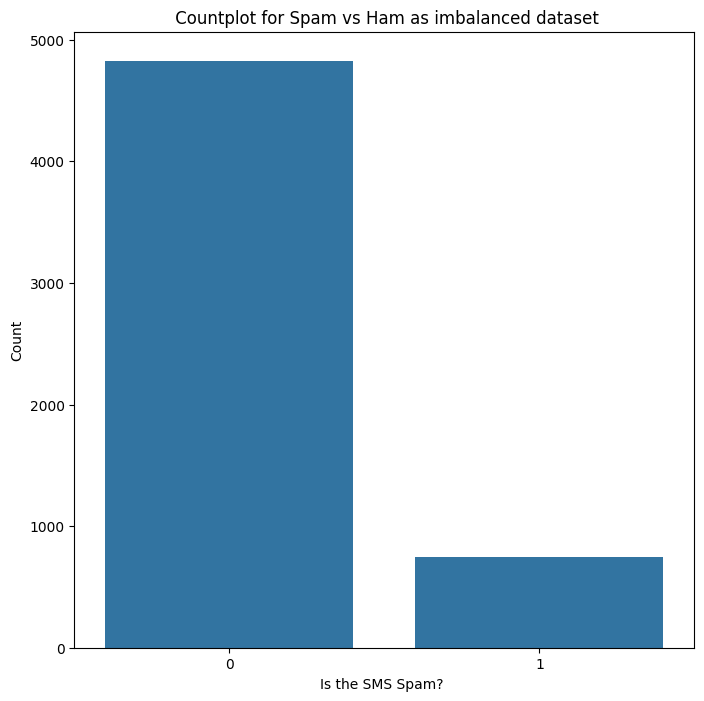

In [11]:
#Countplot for spam vs Ham as imbalanced dataset
plt.figure(figsize= (8,8))
g = sns.countplot( x = 'label' , data = dataset)
p = plt.title(' Countplot for Spam vs Ham as imbalanced dataset')
p = plt.xlabel("Is the SMS Spam? ")
p = plt.ylabel('Count')

In [12]:
#Handling imbalaced dataset using OverSampling
only_spam = dataset[dataset['label'] == 1]

In [13]:
only_spam

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [14]:
print("No of Spam SMS", len(only_spam))
print("No of Ham SMS", len(dataset) - len(only_spam))

No of Spam SMS 747
No of Ham SMS 4825


In [15]:
count = int((dataset.shape[0] - only_spam.shape[0]) / only_spam.shape[0])
count

6

In [16]:
for i in range(0,count-1):
    dataset = pd.concat([dataset, only_spam])

dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


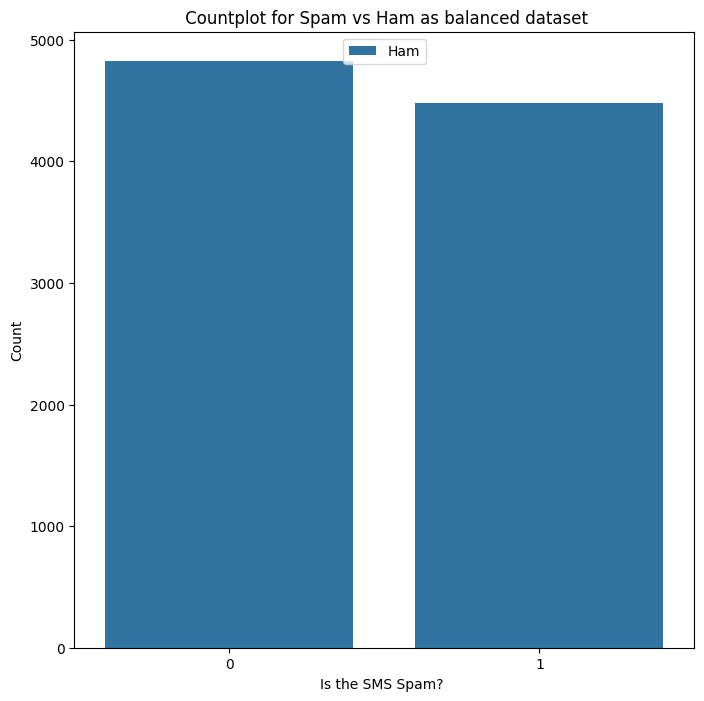

In [17]:
#Countplot for spam vs Ham as imbalanced dataset
plt.figure(figsize= (8,8))
g = sns.countplot( x = 'label' , data = dataset)
p = plt.title(' Countplot for Spam vs Ham as balanced dataset')
p = plt.xlabel("Is the SMS Spam? ")
p = plt.ylabel('Count')
p = plt.legend(labels = ['Ham','Spam'], loc = 9)

In [18]:
#Creating new feacture Word_count
dataset['word_count']= dataset['message'].apply(lambda x: len(x.split()))

In [19]:
dataset

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


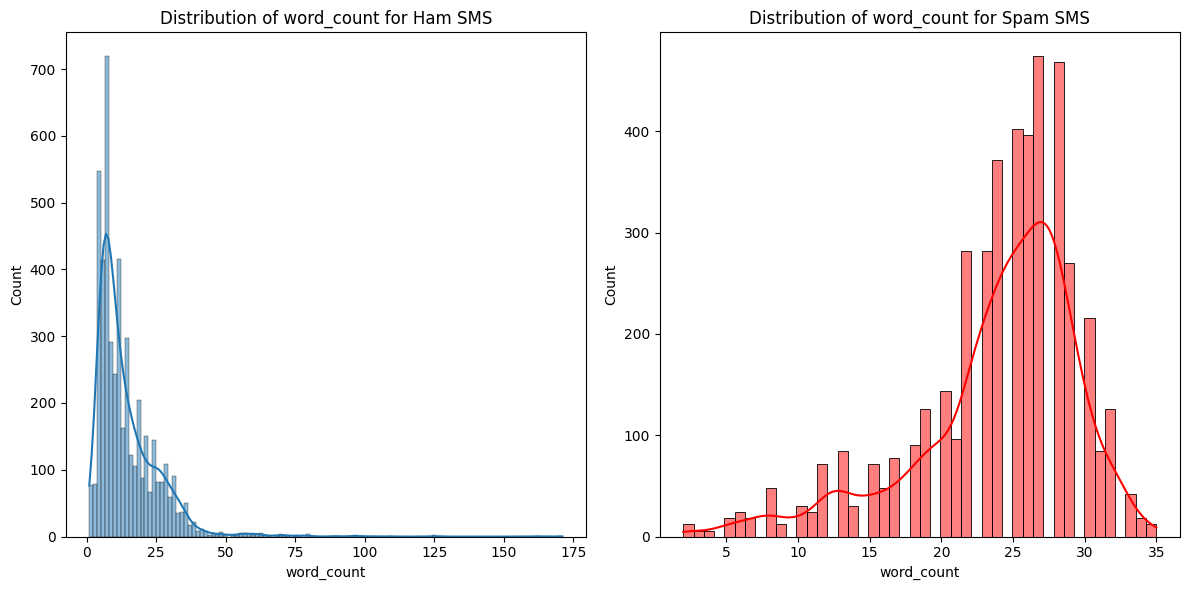

In [20]:
plt.figure(figsize = (12,6))

#(1,1)
plt.subplot(1,2,1)
g = sns.histplot(dataset[dataset['label'] == 0].word_count, kde = True)
p = plt.title("Distribution of word_count for Ham SMS")

#(1,2)
plt.subplot(1,2,2)
g = sns.histplot(dataset[dataset['label'] == 1].word_count, color="red", kde = True)
p = plt.title("Distribution of word_count for Spam SMS")

plt.tight_layout()
plt.show()

In [21]:
#Creating new feacture of containing currency symbols
def currency(data):
    currency_symbols = ['$','€','£',' ₹','¥']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [22]:
dataset["contains_currency_symbols"] = dataset["message"].apply(currency)
dataset

,label,message,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


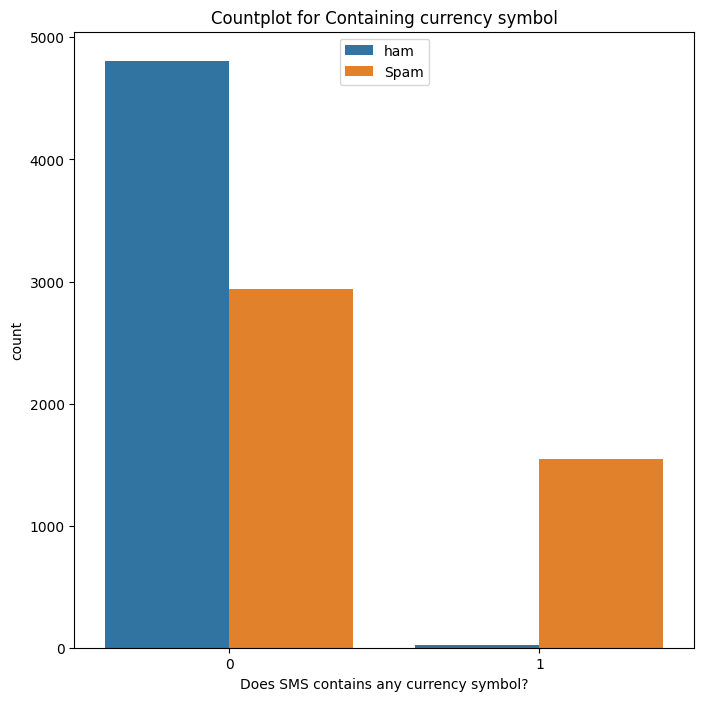

In [23]:
#countplot for containing_currency symbols
plt.figure(figsize=(8,8))
g = sns.countplot(x = 'contains_currency_symbols', data= dataset, hue = 'label')
p = plt.title('Countplot for Containing currency symbol')
p = plt.xlabel('Does SMS contains any currency symbol?')
p = plt.ylabel('count')
p = plt.legend(labels = ["ham",'Spam'],loc = 9)

In [24]:
# Creating new feacture of containing number
def number(data):
    for i in data:
        if (ord(i) >= 40 and ord(i) <=57):#48 
            return 1
    return 0


In [25]:
dataset['contains_number'] = dataset['message'].apply(number)
dataset

,label,message,word_count,contains_currency_symbols,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,1
1,0,Ok lar... Joking wif u oni...,6,0,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,1
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,1
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


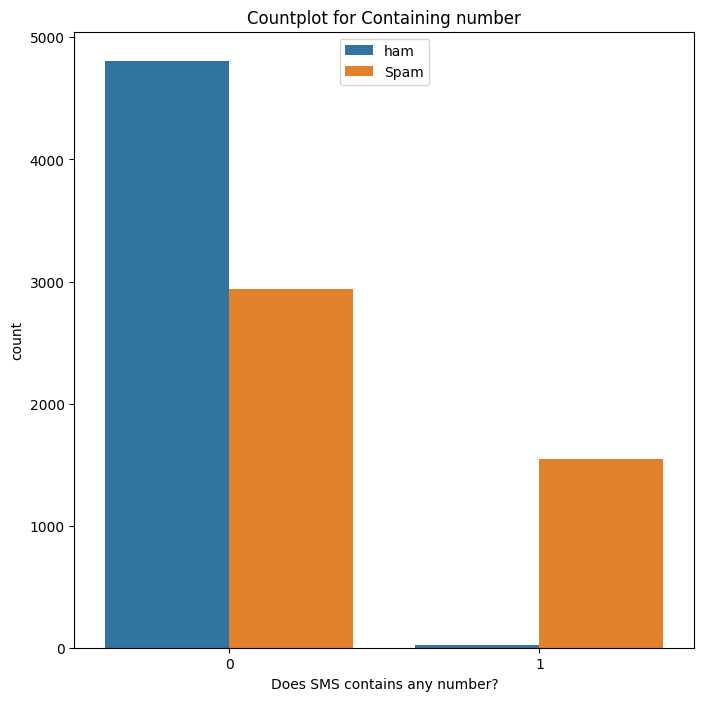

In [26]:
#countplot for containing_currency symbols
plt.figure(figsize=(8,8))
g = sns.countplot(x = 'contains_currency_symbols', data= dataset, hue = 'label')
p = plt.title('Countplot for Containing number')
p = plt.xlabel('Does SMS contains any number?')
p = plt.ylabel('count')
p = plt.legend(labels = ["ham",'Spam'],loc = 9)

In [27]:
#Data Cleaning
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dbhar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dbhar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
corpus = []
wnl = WordNetLemmatizer()

for sms in list(dataset.message):
    message = re.sub(pattern = '[^a-zA-Z]',repl= ' ', string=sms)#filtering out no and symbols
    message = message.lower()
    words = message.split()
    filtered_words= [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    message = ' '.join (lemm_words)
    
    corpus.append(message)
    

In [29]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [30]:
#Creating the Bag ofr words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()#modified

In [31]:
X = pd.DataFrame(vectors,columns = feature_names)
y = dataset['label']

In [32]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [34]:
X_test

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
1155,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.72412,0.0,0.0,0.0,0.0
1790,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.557154,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3003,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
6489,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
592,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8040,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
7213,0.0,0.0,0.0,0.0,0.0,0.333153,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3538,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
8369,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [35]:
#Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb,X,y,scoring= 'f1',cv = 10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.943
0.004


In [36]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1596
           1       0.94      0.95      0.94      1476

    accuracy                           0.94      3072
   macro avg       0.94      0.94      0.94      3072
weighted avg       0.94      0.94      0.94      3072



In [38]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1504,   92],
       [  81, 1395]], dtype=int64)

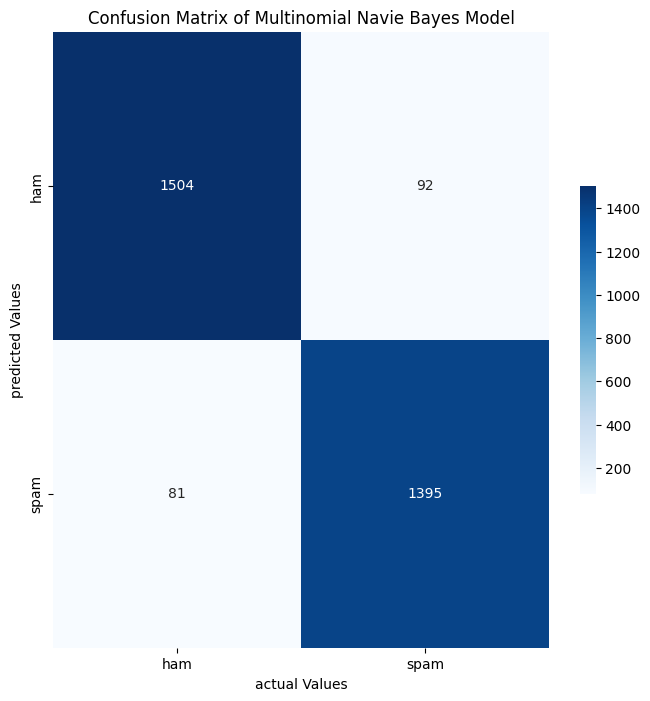

In [39]:
plt.figure(figsize = (8,8))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data = cm, xticklabels = axis_labels, yticklabels =axis_labels, annot = True , fmt = 'g' , cbar_kws = {"shrink": 0.5}, cmap = "Blues")
p = plt.title("Confusion Matrix of Multinomial Navie Bayes Model")
p = plt.xlabel('actual Values')
p = plt.ylabel("predicted Values")

In [40]:
##Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt,X,y,scoring = 'f1', cv = 10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))

0.98
0.004


In [41]:
dt.fit(X_train, y_train)
t_pred1 = dt.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1596
           1       0.94      0.95      0.94      1476

    accuracy                           0.94      3072
   macro avg       0.94      0.94      0.94      3072
weighted avg       0.94      0.94      0.94      3072



In [43]:
cm = confusion_matrix(y_test,t_pred1)
cm

array([[1538,   58],
       [  11, 1465]], dtype=int64)

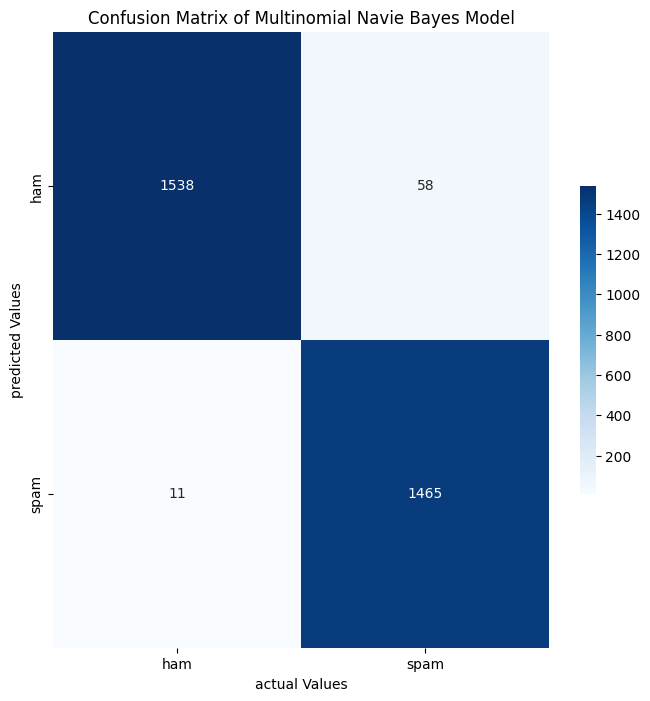

In [44]:
plt.figure(figsize = (8,8))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data = cm, xticklabels = axis_labels, yticklabels =axis_labels, annot = True , fmt = 'g' , cbar_kws = {"shrink": 0.5}, cmap = "Blues")
p = plt.title("Confusion Matrix of Multinomial Navie Bayes Model")
p = plt.xlabel('actual Values')
p = plt.ylabel("predicted Values")

In [45]:
def predict_spam(sms):
    message = re.sub(pattern = '[^a-zA-Z]',repl= ' ', string=sms)#filtering out no and symbols
    message = message.lower()
    words = message.split()
    filtered_words= [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    message = ' '.join (lemm_words)
    temp = tfidf.transform([message]).toarray()
    return (mnb.predict(temp)[0])

In [46]:
#Prediction 1: Lottery Text 
sample_message = 'IMPORTANT- You could be entitled up to $3,160 in compensation from mis-soja PPI on a credit cardor loan'

if predict_spam(sample_message):
    print("Gotchap! This is a Spam")
    
else:
    print("Ham Message")

Gotchap! This is a Spam


C:\Users\dbhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [47]:
#Prediction 2: Causal Text
sample_message = 'Came to think of it, I have never got a spam message before'

if predict_spam(sample_message):
    print("Gotchap! This is a Spam")
    
else:
    print("Ham Message")

Ham Message


C:\Users\dbhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
